In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored 
in the 2013-2014 season. 

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data: <br>
player - name of the player <br>
pos - the position of the player <br>
g - number of games the player was in <br>
gs - number of games the player started <br>
pts - total points the player scored <br>

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

We can read our dataset in and figure out which columns are present:

import pandas
with open("nba_2013.csv", 'r') as csvfile:
nba = pandas.read_csv(csvfile)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
nba = pd.read_csv('nba_2013.csv')
nba.drop(columns=['player','season','season_end'],axis=1,inplace=True)
nba.fillna(0,inplace=True)
nba.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328


In [3]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           481 non-null    object 
 1   age           481 non-null    int64  
 2   bref_team_id  481 non-null    object 
 3   g             481 non-null    int64  
 4   gs            481 non-null    int64  
 5   mp            481 non-null    int64  
 6   fg            481 non-null    int64  
 7   fga           481 non-null    int64  
 8   fg.           481 non-null    float64
 9   x3p           481 non-null    int64  
 10  x3pa          481 non-null    int64  
 11  x3p.          481 non-null    float64
 12  x2p           481 non-null    int64  
 13  x2pa          481 non-null    int64  
 14  x2p.          481 non-null    float64
 15  efg.          481 non-null    float64
 16  ft            481 non-null    int64  
 17  fta           481 non-null    int64  
 18  ft.           481 non-null    

In [4]:
nba.describe().T

,count,mean,std,min,25%,50%,75%,max
age,481.0,26.509356,4.198265,19.0,23.000000,26.000000,29.00000,39.0
g,481.0,53.253638,25.322711,1.0,32.000000,61.000000,76.00000,83.0
gs,481.0,25.571726,29.658465,0.0,0.000000,10.000000,54.00000,82.0
mp,481.0,1237.386694,897.258840,1.0,388.000000,1141.000000,2016.00000,3122.0
fg,481.0,192.881497,171.832793,0.0,47.000000,146.000000,307.00000,849.0
fga,481.0,424.463617,368.850833,0.0,110.000000,332.000000,672.00000,1688.0
fg.,481.0,0.434622,0.102401,0.0,0.400000,0.437000,0.47900,1.0
x3p,481.0,39.613306,50.855639,0.0,0.000000,16.000000,68.00000,261.0
x3pa,481.0,110.130977,132.751732,0.0,3.000000,48.000000,193.00000,615.0
x3p.,481.0,0.245397,0.176482,0.0,0.000000,0.314607,0.36646,1.0


In [5]:
nba.corr().iloc[:,-1:]

,pts
age,-0.011910
g,0.728462
gs,0.810294
mp,0.927464
fg,0.992041
fga,0.989211
fg.,0.257634
x3p,0.655342
x3pa,0.672076
x3p.,0.272773


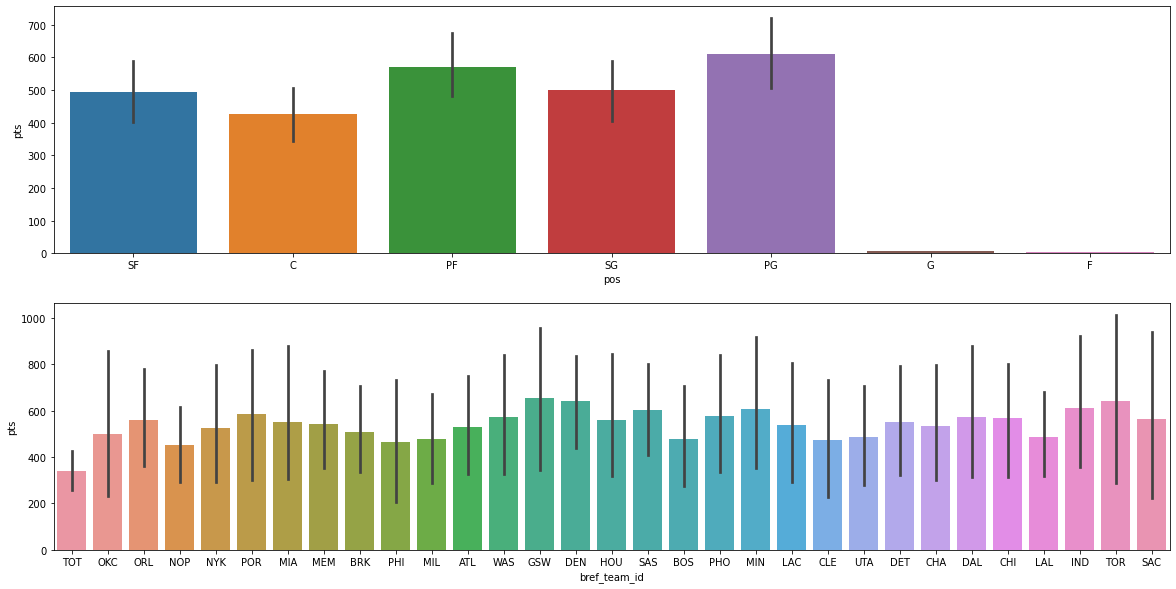

In [6]:
col = ['pos','bref_team_id']

fig,ax = plt.subplots(2,1,figsize=(20,10))
a = 0

for i in col:
    sns.barplot(x=nba[i],y='pts',data=nba,ax=ax[a])
    a = a + 1

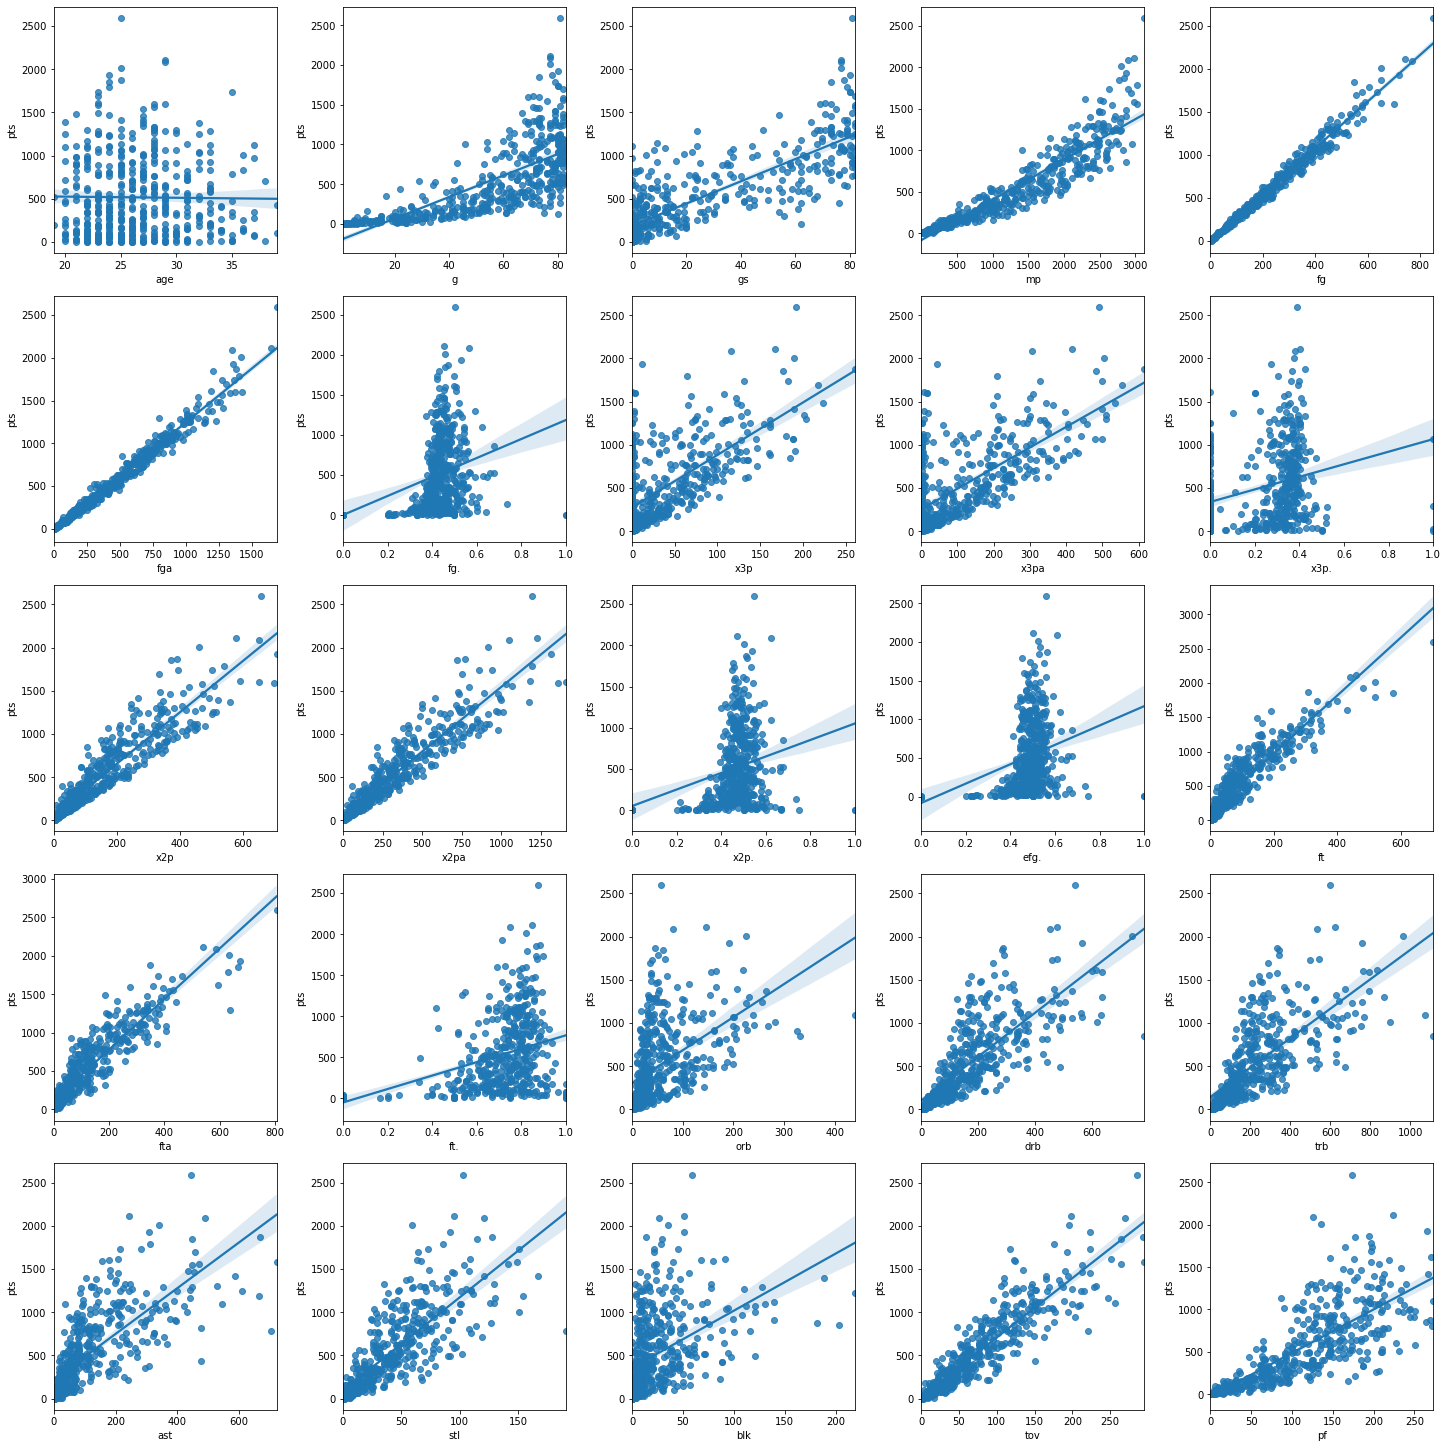

In [7]:
col = ['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', \
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf']

fig,ax = plt.subplots(5,5, figsize=(20,20),constrained_layout=True)
a = 0

for i in range(0,5):
    for j in range(0,5):
        if a <= 24:
            c = col[a]
            sns.regplot(x=nba[c],y='pts',data=nba,ax=ax[i,j])
            a = a + 1

In [8]:
ohe = pd.get_dummies(nba,columns=['pos','bref_team_id'])
ohe.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,bref_team_id_ORL,bref_team_id_PHI,bref_team_id_PHO,bref_team_id_POR,bref_team_id_SAC,bref_team_id_SAS,bref_team_id_TOR,bref_team_id_TOT,bref_team_id_UTA,bref_team_id_WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.000000,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.000000,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [9]:
X = ohe.drop(columns=['pts'],axis=1)
y = ohe['pts']

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [10]:
knn = KNeighborsRegressor(n_neighbors=14,weights='distance',p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(round(r2_score(y_test,y_pred)*100,4), round(mean_absolute_error(y_test,y_pred),4), round(mean_squared_error(y_test,y_pred),4))

96.2325 51.4188 6540.3375
